In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

API_KEY =  'JB01QMIO6Y6OVRTD' #'LL6T7E05ODLIGILE' 
BASE_URL = 'https://www.alphavantage.co/query'


In [2]:
def fetch_data(params):
    response = requests.get('https://www.alphavantage.co/query?' + params + '&apikey=JB01QMIO6Y6OVRTD')
    rdata = response.json()
    if len(rdata) <= 1:
        #exception for data fetch error
        print(rdata)
        raise Exception("data fetch error")
    else:
        return rdata

In [3]:
combined_data = {}

# Die Funktion, um Close-Werte des S&P 500 abzurufen
def get_sp500_open_values():
    data = fetch_data('function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=SPY')
    time_series = data['Monthly Adjusted Time Series']
    for key,v in time_series.items():
        time_series[key]={'value' :float(v['4. close'])}
    return time_series #{'date': {'value' = x}}
    
# Die Funktion, um GDP-Daten abzurufen 
def get_gdp_values():
    d = fetch_data('function=REAL_GDP&interval=quarterly')
    dl = d['data'] #[{'date': 'X', 'value': 'Y'}]
    data = {}
    for i in dl:
        data[i['date']]={'value':float(i['value'])}
    return data #{'date': {'value' = x}}

def get_unemployment_values():
    d = fetch_data('function=UNEMPLOYMENT')
    dl = d['data'] #[{'date': 'X', 'value': 'Y'}]
    data = {}
    for i in dl:
        data[i['date']]={'value': float(i['value'])}
    return data #{'date': {'value' = x}}
    
def get_inflation_values():
    d = fetch_data('function=INFLATION')
    dl = d['data'] #[{'date': 'X', 'value': 'Y'}]
    data = {}
    for i in dl:
        data[i['date']]={'value' : float(i['value'])}
    return data #{'date': {'value' = x}}

combined_data['GDP'] = get_gdp_values()
combined_data['SPY'] = get_sp500_open_values()
combined_data['UEM'] = get_unemployment_values()
combined_data['INF'] = get_inflation_values()

print(combined_data)

csv_names = set()

{'GDP': {'2023-04-01': {'value': 5105.025}, '2023-01-01': {'value': 4950.82}, '2022-10-01': {'value': 5157.178}, '2022-07-01': {'value': 5018.093}, '2022-04-01': {'value': 4985.795}, '2022-01-01': {'value': 4855.857}, '2021-10-01': {'value': 5110.951}, '2021-07-01': {'value': 4916.402}, '2021-04-01': {'value': 4890.835}, '2021-01-01': {'value': 4691.624}, '2020-10-01': {'value': 4843.66}, '2020-07-01': {'value': 4701.108}, '2020-04-01': {'value': 4335.915}, '2020-01-01': {'value': 4628.46}, '2019-10-01': {'value': 4901.993}, '2019-07-01': {'value': 4796.221}, '2019-04-01': {'value': 4753.025}, '2019-01-01': {'value': 4584.814}, '2018-10-01': {'value': 4772.161}, '2018-07-01': {'value': 4689.905}, '2018-04-01': {'value': 4646.83}, '2018-01-01': {'value': 4500.182}, '2017-10-01': {'value': 4668.375}, '2017-07-01': {'value': 4556.956}, '2017-04-01': {'value': 4510.507}, '2017-01-01': {'value': 4340.814}, '2016-10-01': {'value': 4535.075}, '2016-07-01': {'value': 4449.603}, '2016-04-01': {

In [7]:
def combined_data_to_df_to_csv():
    for key, data in combined_data.items():
        df = pd.DataFrame(data).T
        df.index = pd.to_datetime(df.index)
        df['value'] = df['value'].astype(float)
        file = "EcoData/" + key + ".csv"
        if not file in csv_names:
            df.to_csv("EcoData/" + key + ".csv")
            csv_names.add("EcoData/" + key + ".csv")
            print("Daten wurden erfolgreich in 'EcoData/" + key + ".csv' gespeichert.")
                  
combined_data_to_df_to_csv()   
#print(csv_names)

def csv_to_combined_df():
    combined_d = {}
    for csv_name in csv_names:
        combined_d[csv_name[8:11]] = pd.read_csv(csv_name)
    return combined_d
        
combined_df2 = csv_to_combined_df()
#print(combined_data)
print(combined_df2)

Daten wurden erfolgreich in 'EcoData/GDP.csv' gespeichert.
Daten wurden erfolgreich in 'EcoData/SPY.csv' gespeichert.
Daten wurden erfolgreich in 'EcoData/UEM.csv' gespeichert.
Daten wurden erfolgreich in 'EcoData/INF.csv' gespeichert.
{'INF':     Unnamed: 0     value
0   2022-01-01  8.002800
1   2021-01-01  4.697859
2   2020-01-01  1.233584
3   2019-01-01  1.812210
4   2018-01-01  2.442583
..         ...       ...
58  1964-01-01  1.278912
59  1963-01-01  1.239669
60  1962-01-01  1.198773
61  1961-01-01  1.070724
62  1960-01-01  1.457976

[63 rows x 2 columns], 'SPY':      Unnamed: 0     value
0    2023-09-08  445.5200
1    2023-08-31  450.3500
2    2023-07-31  457.7900
3    2023-06-30  443.2800
4    2023-05-31  417.8500
..          ...       ...
281  2000-04-28  145.0937
282  2000-03-31  150.3750
283  2000-02-29  137.4375
284  2000-01-31  139.5625
285  1999-12-31  146.8750

[286 rows x 2 columns], 'GDP':     Unnamed: 0     value
0   2023-04-01  5105.025
1   2023-01-01  4950.820
2   20

In [1]:
def csv_df_to_data():
    data = {}
    keys = combined_df2.keys()
    j = 0
    for date in combined_df2:
        #print(1)
        #print(combined_df2[date]['Unnamed: 0'].to_list())
        dates = combined_df2[date]['Unnamed: 0'].to_list()
        values = combined_df2[date]['value'].to_list()
        symbols = {}
        for i in range (len(dates)):
            symbols[dates[i]] = {'value' : values[i]}
        keys = list(combined_df2.keys())
        print(keys[j])
        print(symbols)
        data[keys[j]] = symbols
        j += 1
    
    return data        
csv_data = csv_df_to_data()
#print(csv_data)



NameError: name 'combined_df2' is not defined

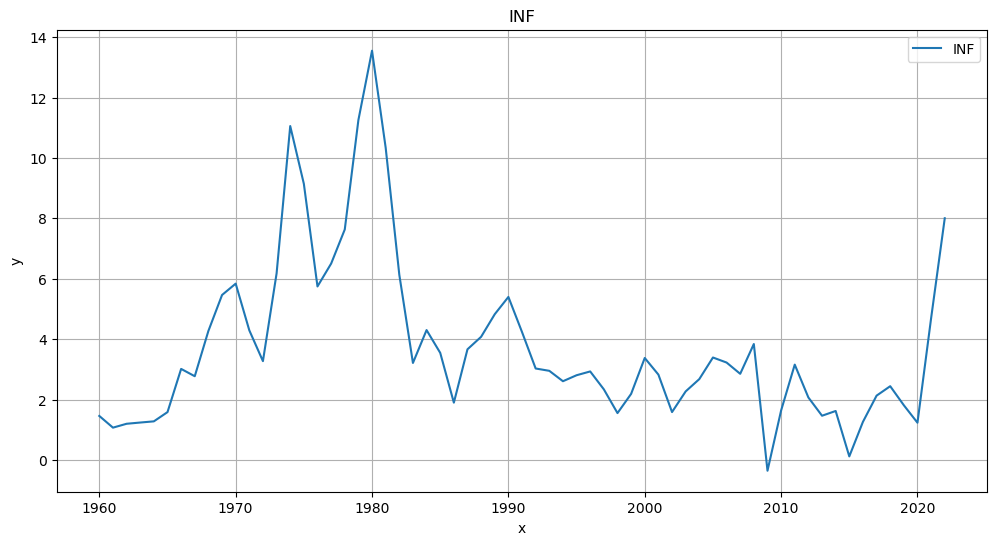

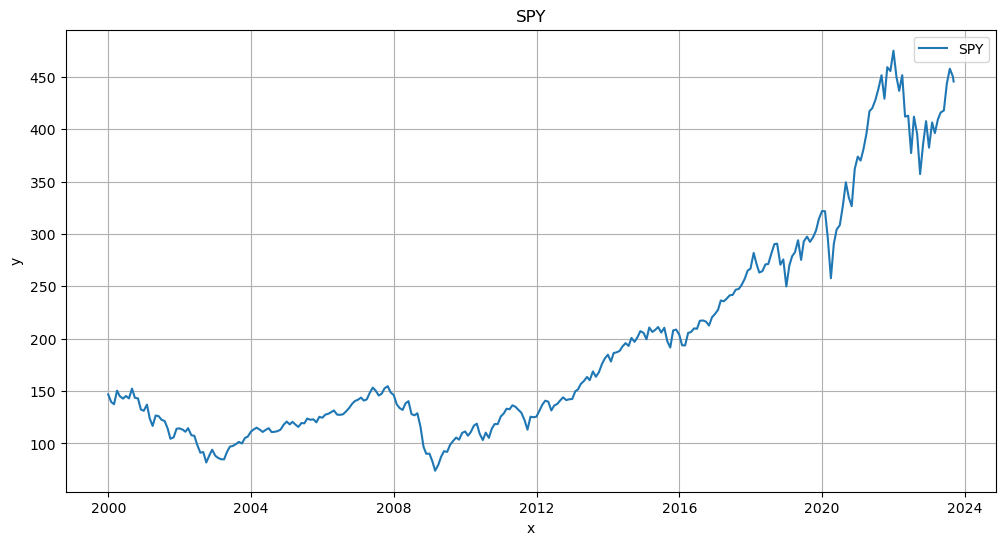

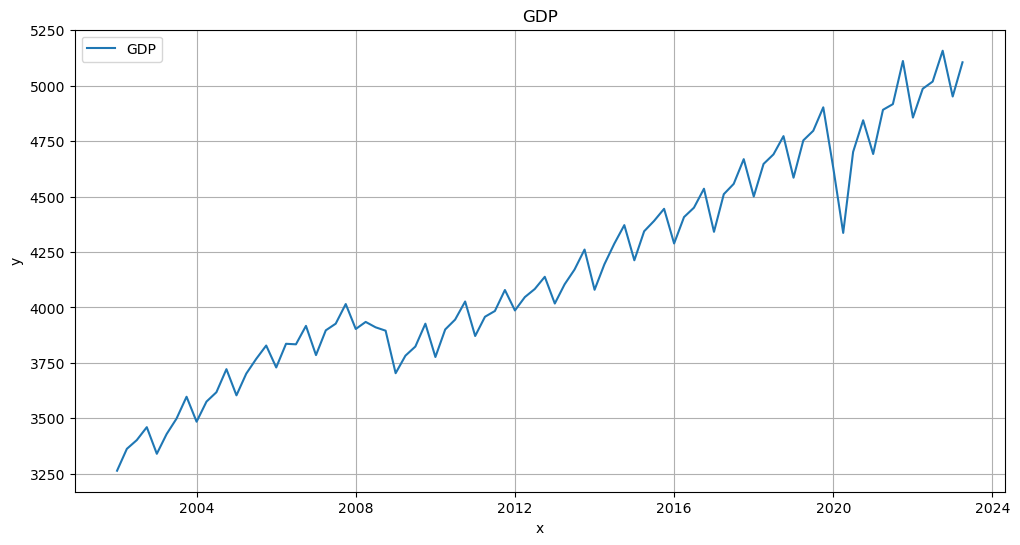

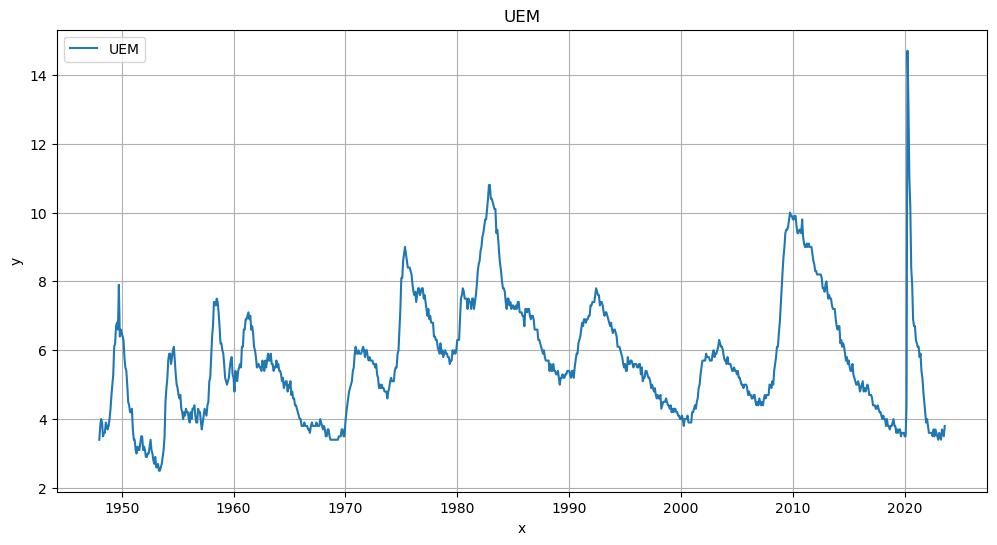

In [18]:
def show_combined_data():
    for key, data in csv_data.items():
        df = pd.DataFrame(data).T
        df.index = pd.to_datetime(df.index)
        df['value'] = df['value'].astype(float)
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df['value'], label=key)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(key)
        plt.legend()
        plt.grid(True)
        plt.show()

show_combined_data()